# first we start with cleansing and EDA processing.


In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split        # feature scaling model selection
from sklearn.preprocessing import StandardScaler

In [104]:
#import data
raw_df = pd.read_csv("Life Expectancy Data.csv")


In [105]:
#show first 10 rows
raw_df.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [106]:
# what are our columns
raw_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [107]:
#show more information about the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [108]:
raw_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [109]:
#we find statistics about the dataframe
raw_df.describe()
#because count is different from a column to another we deduce that some columns have missing values

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [110]:
#we find which columns have null values
raw_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

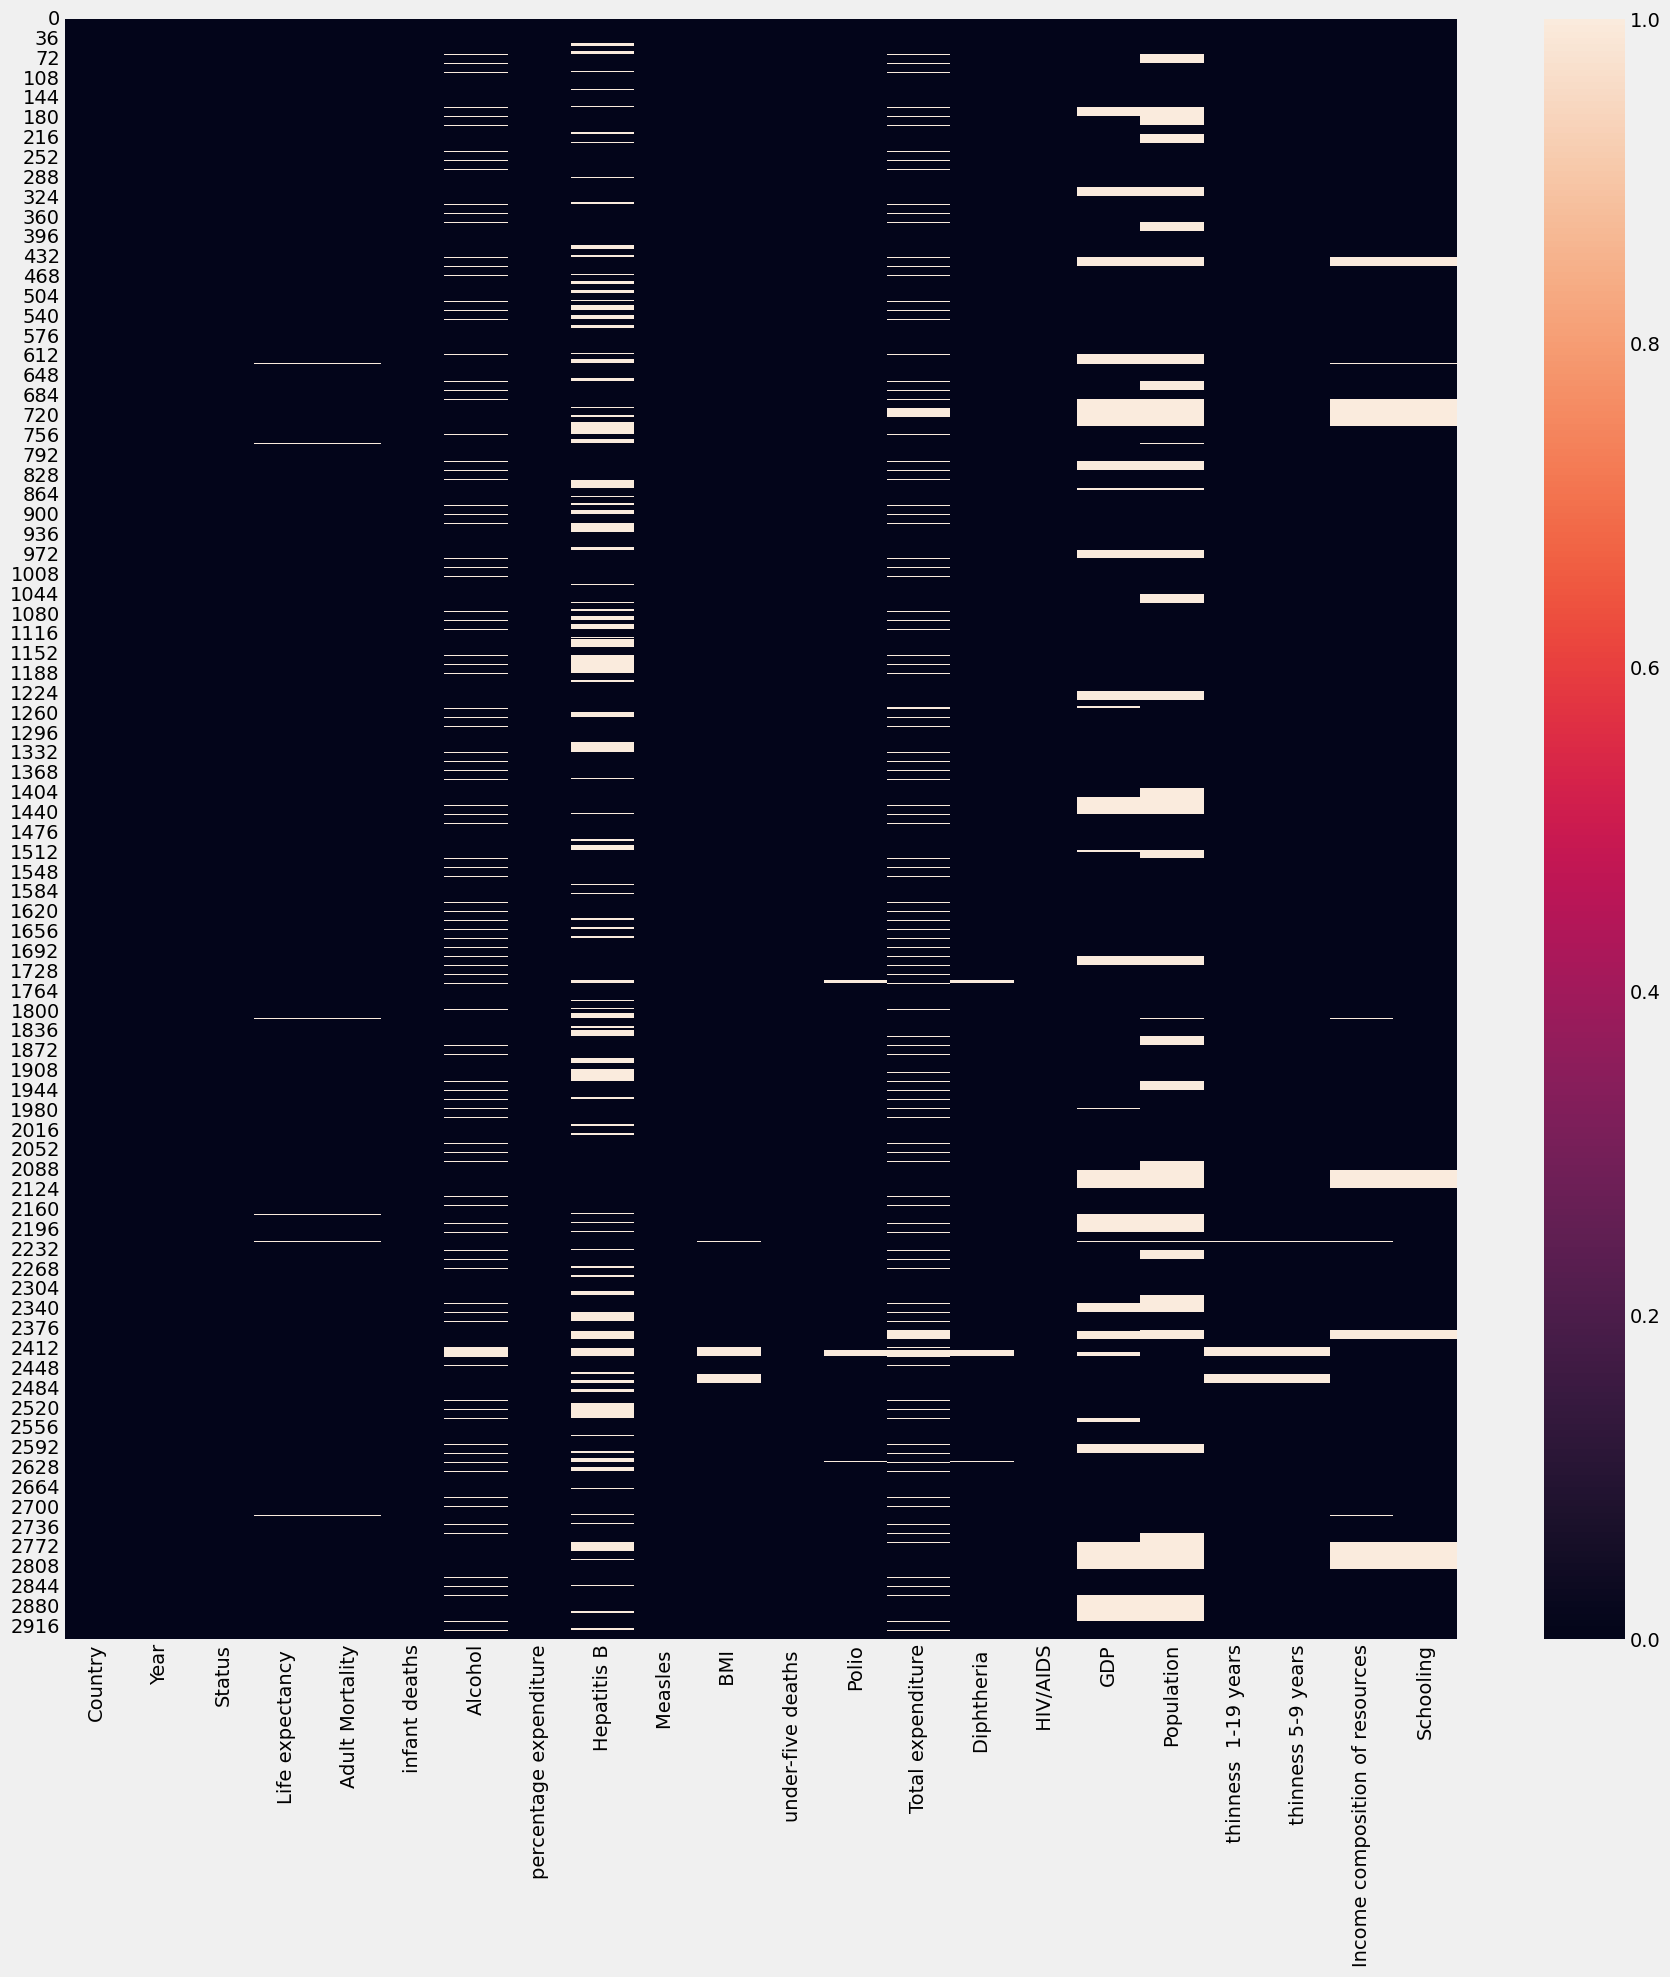

In [111]:
# show where you have null values in  heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(raw_df.isnull())
plt.show()

In [112]:
#convert all missing values into Median(because it is not impacted by outliers and missing values)

missingfree_df = raw_df.copy()
missingfree_df["Life expectancy "]=missingfree_df["Life expectancy "].fillna(missingfree_df["Life expectancy "].mode()[0])
missingfree_df["Adult Mortality"]=missingfree_df["Adult Mortality"].fillna(missingfree_df["Adult Mortality"].mode()[0])
missingfree_df["Alcohol"]=missingfree_df["Alcohol"].fillna(missingfree_df["Alcohol"].mode()[0])
missingfree_df["Hepatitis B"]=missingfree_df["Hepatitis B"].fillna(missingfree_df["Hepatitis B"].mode()[0])
missingfree_df[" BMI "]=missingfree_df[" BMI "].fillna(missingfree_df[" BMI "].mode()[0])
missingfree_df["Polio"]=missingfree_df["Polio"].fillna(missingfree_df["Polio"].mode()[0])
missingfree_df["Total expenditure"]=missingfree_df["Total expenditure"].fillna(missingfree_df["Total expenditure"].mode()[0])
missingfree_df["Diphtheria "]=missingfree_df["Diphtheria "].fillna(missingfree_df["Diphtheria "].mode()[0])
missingfree_df["GDP"]=missingfree_df["GDP"].fillna(missingfree_df["GDP"].mode()[0])
missingfree_df["Population"]=missingfree_df["Population"].fillna(missingfree_df["Population"].mode()[0])
missingfree_df[" thinness  1-19 years"]=missingfree_df[" thinness  1-19 years"].fillna(missingfree_df[" thinness  1-19 years"].mode()[0])
missingfree_df[" thinness 5-9 years"]=missingfree_df[" thinness 5-9 years"].fillna(missingfree_df[" thinness 5-9 years"].mode()[0])
missingfree_df["Income composition of resources"]=missingfree_df["Income composition of resources"].fillna(missingfree_df["Income composition of resources"].mode()[0])
missingfree_df["Schooling"]=missingfree_df["Schooling"].fillna(missingfree_df["Schooling"].mode()[0])



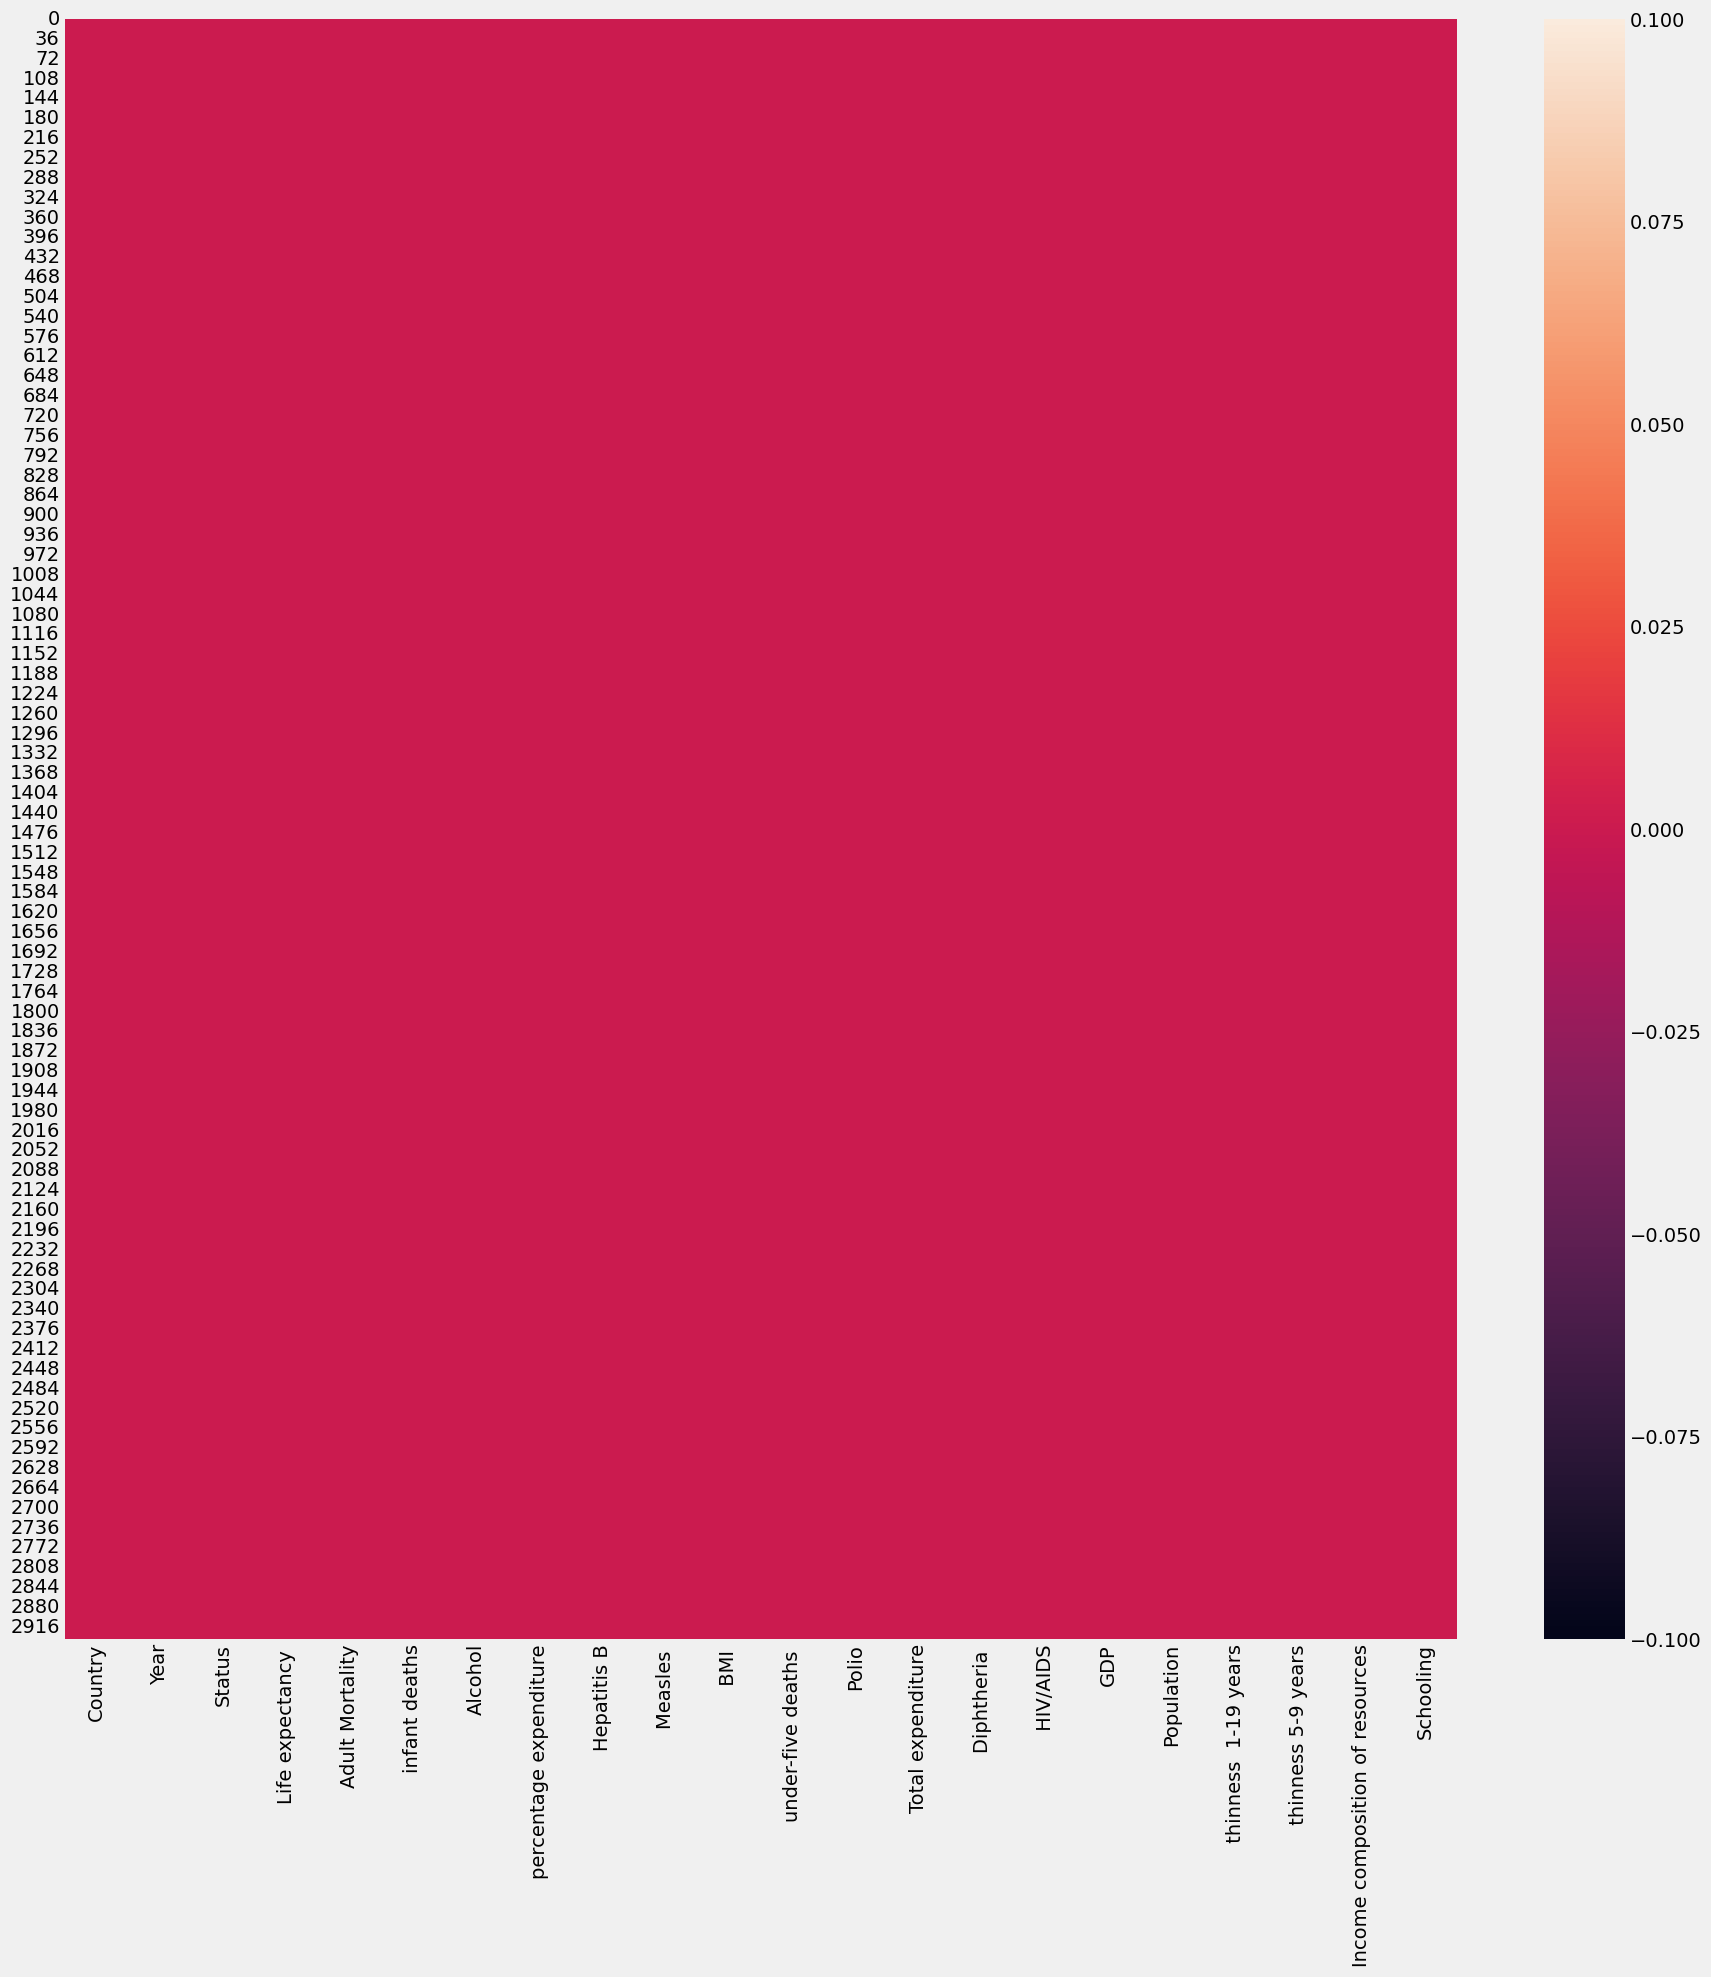

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(missingfree_df.isnull())
plt.show()

In [114]:
# drop duplicated duplicates

missingfree_df.drop_duplicates(inplace= True)

In [115]:
#convert unnumerical columns to numerical values
 #only categorical columns is Status                               
 
missingfree_df['Status'].unique()


array(['Developing', 'Developed'], dtype=object)

In [116]:
#we replace developing to 0 and developed to 1  
#we do that to make it easier for machine learning models to work with

missingfree_df["Status"].replace({"Developing":0,"Developed":1},inplace=True)


missingfree_df["Status"].unique()
clean_df = missingfree_df 


<Figure size 2000x2000 with 0 Axes>

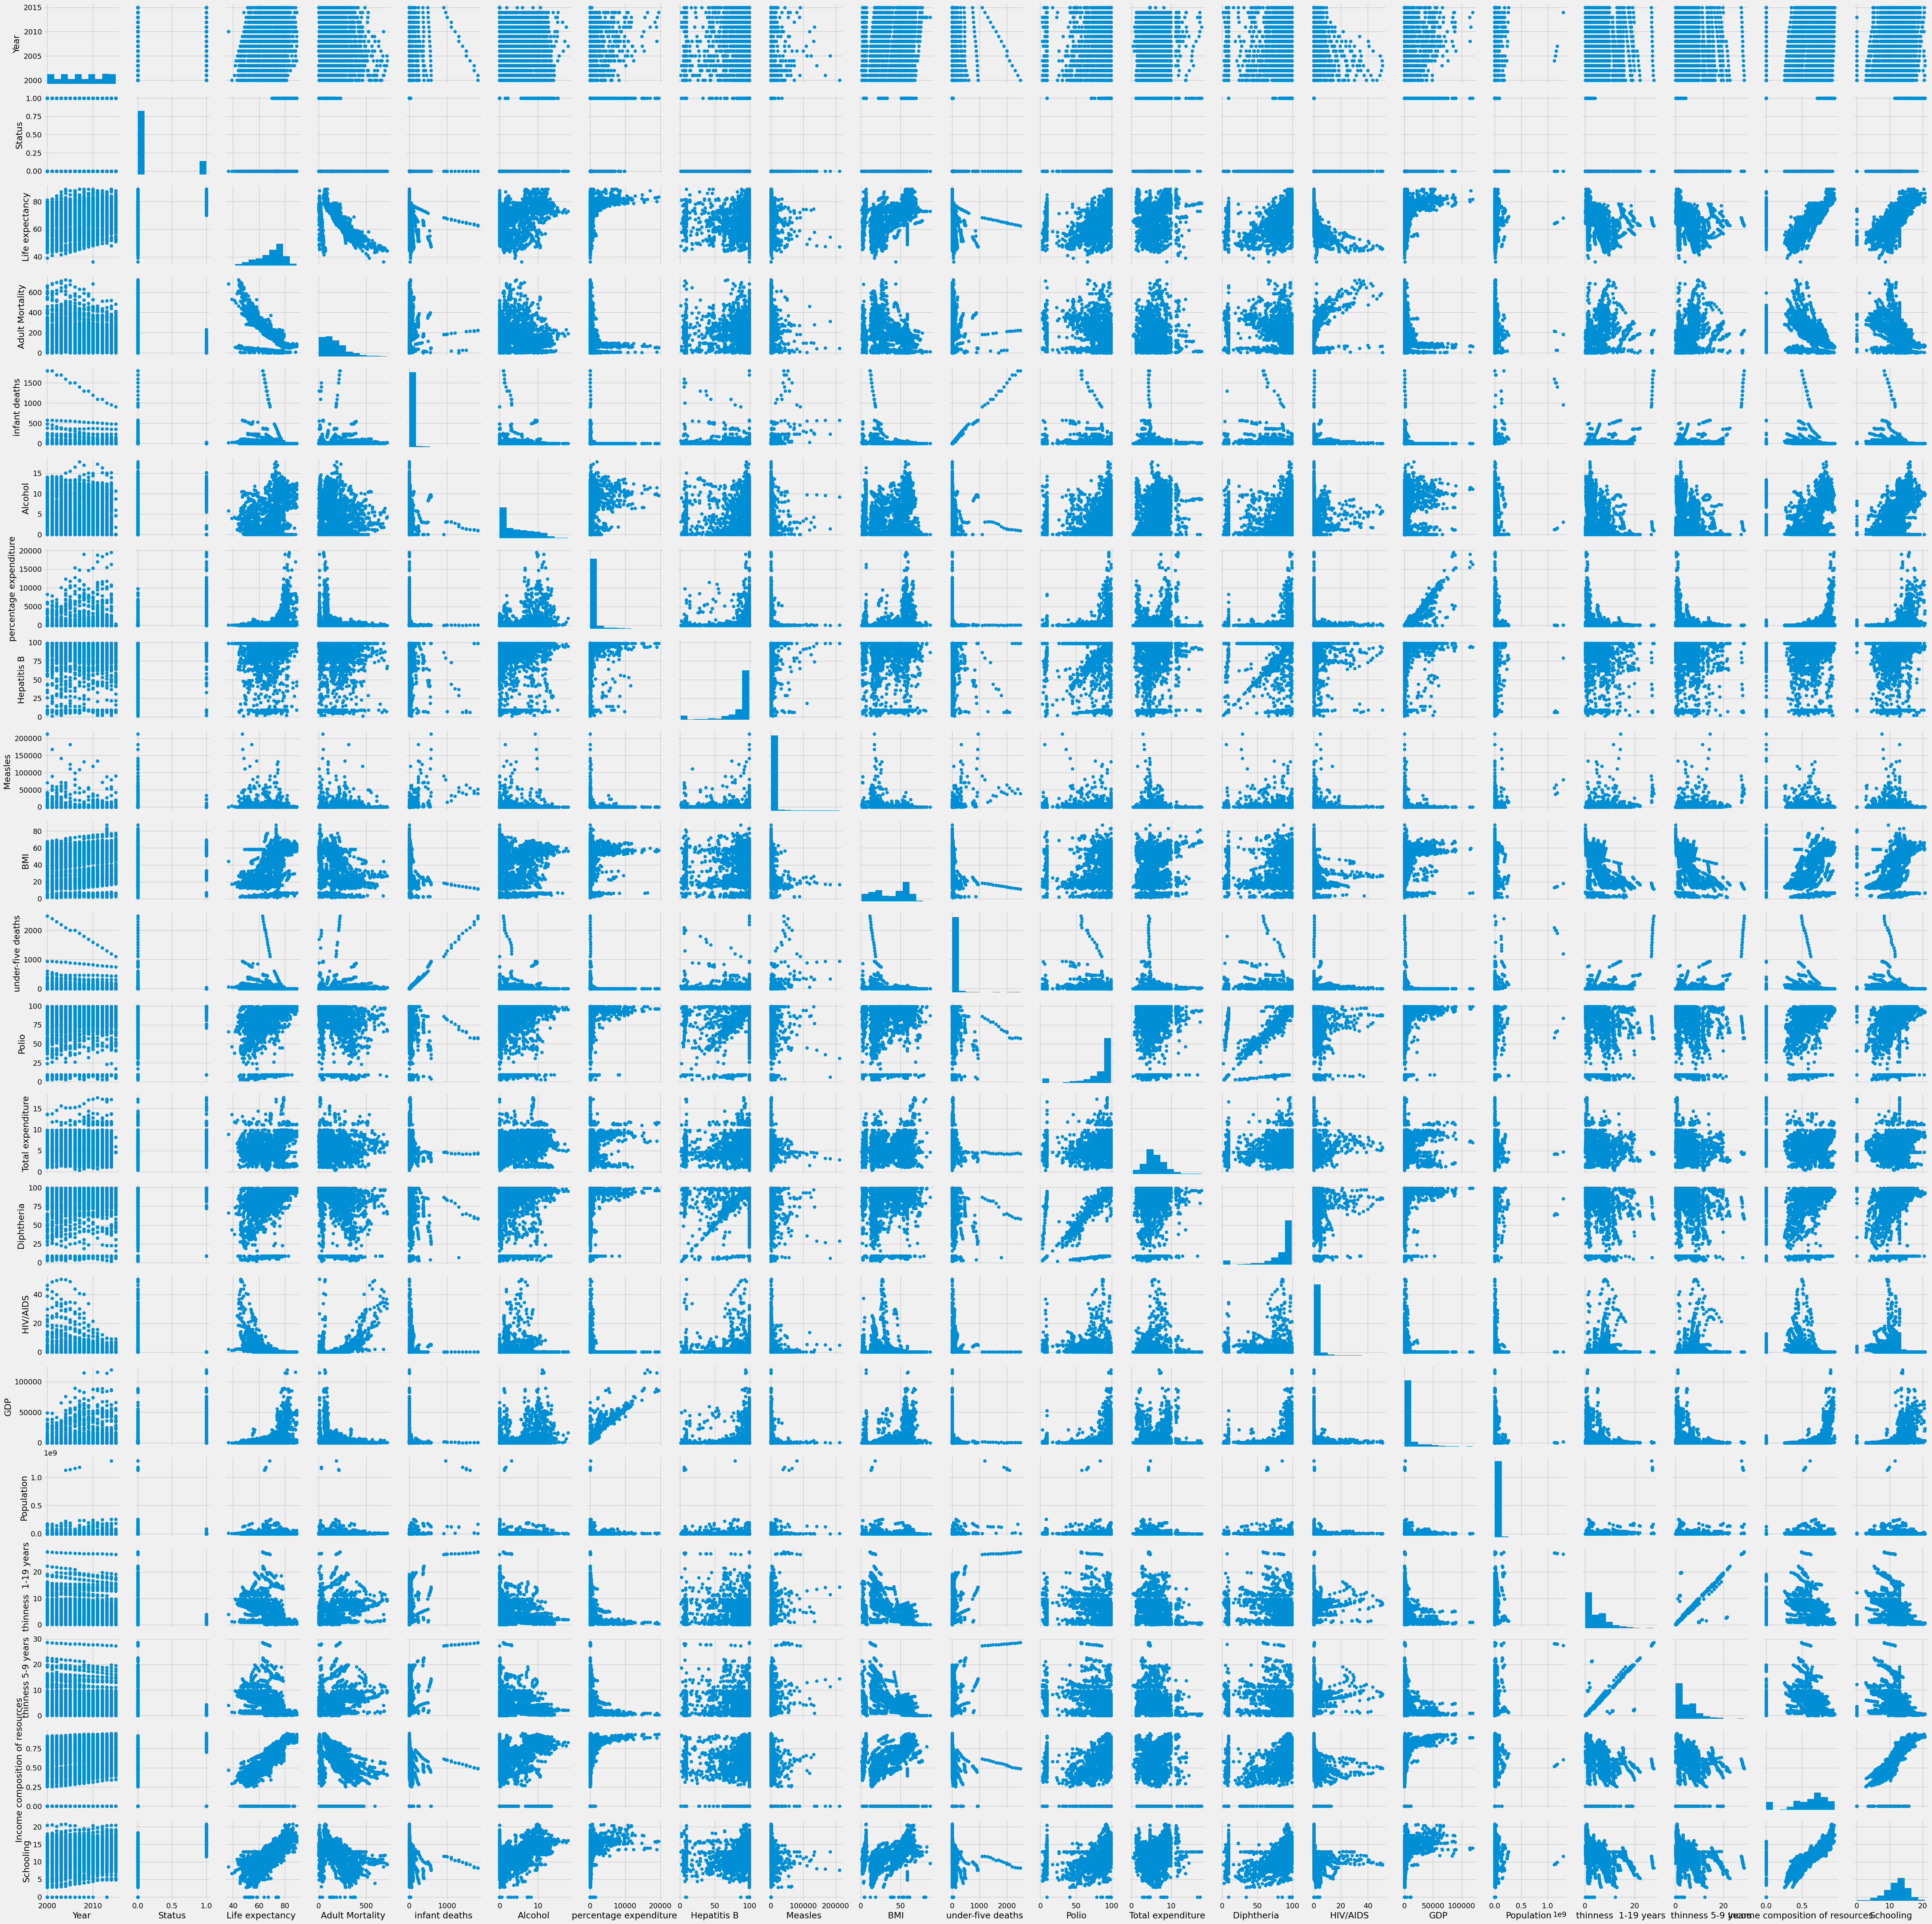

In [117]:
# visualizations of data 

#understand the distribution of the data in order to use it for pearsonr statistical analysis for correlation analysis


plt.figure(figsize=(20,20))
g= sns.PairGrid(clean_df)
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)
plt.show()



In [ ]:
# from the plot above we deduce that some of the features has a non linear distribution which is not good for pearson correlation


In [118]:
#other visualizations
clean_df.columns
clean_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [119]:
#replace any column name space with underscores

clean_df.columns = clean_df.columns.str.replace(" ", "_")


In [120]:
clean_df 

Country  Year  Status  Life_expectancy_  Adult_Mortality  \
0     Afghanistan  2015       0              65.0            263.0   
1     Afghanistan  2014       0              59.9            271.0   
2     Afghanistan  2013       0              59.9            268.0   
3     Afghanistan  2012       0              59.5            272.0   
4     Afghanistan  2011       0              59.2            275.0   
...           ...   ...     ...               ...              ...   
2933     Zimbabwe  2004       0              44.3            723.0   
2934     Zimbabwe  2003       0              44.5            715.0   
2935     Zimbabwe  2002       0              44.8             73.0   
2936     Zimbabwe  2001       0              45.3            686.0   
2937     Zimbabwe  2000       0              46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population  _thinness__1-19_years  _thinness_5-9_years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427   

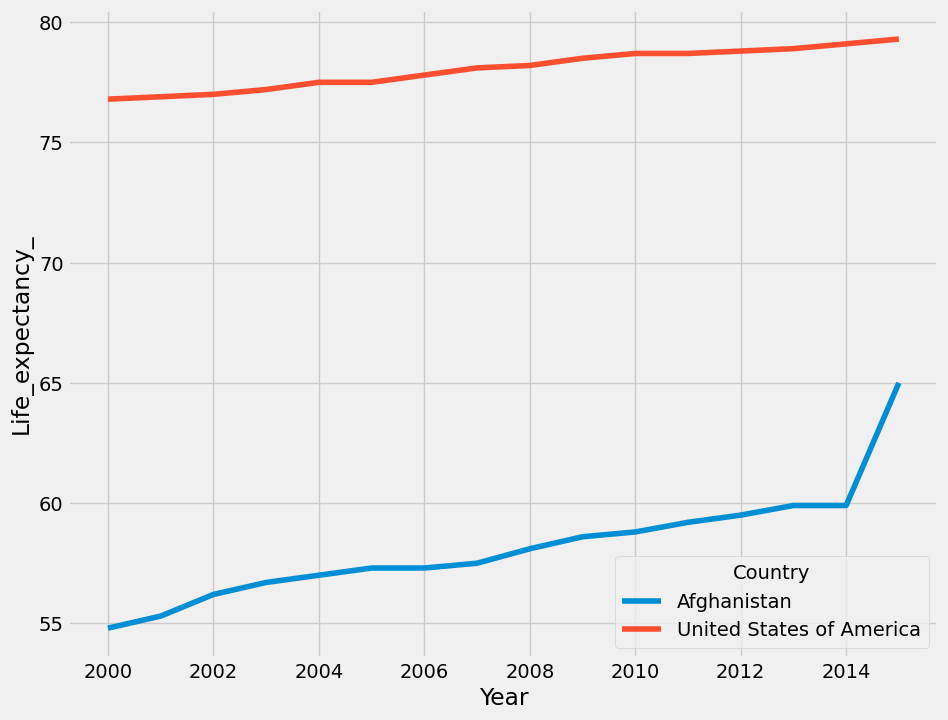

In [121]:
#Here we scale data so there is no columns that overcovers other data
#find the improvement of the life expectancy for the united states and afganstan between the years  2000-2015
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
af_us_df = clean_df.loc[(clean_df["Country"] == "Afghanistan") | (clean_df["Country"] == "United States of America")]
sns.lineplot(x=af_us_df["Year"], y= af_us_df["Life_expectancy_"],hue = af_us_df["Country"])
plt.show()

In [40]:
#we deduce that while the USA is having a little increase in the life expectancy that is increased in a steady pace life expectancy in Afganstan increased dramatically between 2014 and 2015

In [122]:
af_us_df

Country  Year  Status  Life_expectancy_  \
0                  Afghanistan  2015       0              65.0   
1                  Afghanistan  2014       0              59.9   
2                  Afghanistan  2013       0              59.9   
3                  Afghanistan  2012       0              59.5   
4                  Afghanistan  2011       0              59.2   
5                  Afghanistan  2010       0              58.8   
6                  Afghanistan  2009       0              58.6   
7                  Afghanistan  2008       0              58.1   
8                  Afghanistan  2007       0              57.5   
9                  Afghanistan  2006       0              57.3   
10                 Afghanistan  2005       0              57.3   
11                 Afghanistan  2004       0              57.0   
12                 Afghanistan  2003       0              56.7   
13                 Afghanistan  2002       0              56.2   
14                 Afghanistan  2001       0              55.3   
15                 Afghanistan  2000       0              54.8   
2794  United States of America  2015       1              79.3   
2795  United States of America  2014       1              79.1   
2796  United States of America  2013       1              78.9   
2797  United States of America  2012       1              78.8   
2798  United States of America  2011       1              78.7   
2799  United States of America  2010       1              78.7   
2800  United States of America  2009       1              78.5   
2801  United States of America  2008       1              78.2   
2802  United States of America  2007       1              78.1   
2803  United States of America  2006       1              77.8   
2804  United States of America  2005       1              77.5   
2805  United States of America  2004       1              77.5   
2806  United States of America  2003       1              77.2   
2807  United States of America  2002       1              77.0   
2808  United States of America  2001       1              76.9   
2809  United States of America  2000       1              76.8   

      Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0               263.0             62     0.01               71.279624   
1               271.0             64     0.01               73.523582   
2               268.0             66     0.01               73.219243   
3               272.0             69     0.01               78.184215   
4               275.0             71     0.01                7.097109   
5               279.0             74     0.01               79.679367   
6               281.0             77     0.01               56.762217   
7               287.0             80     0.03               25.873925   
8               295.0             82     0.02               10.910156   
9               295.0             84     0.03               17.171518   
10              291.0             85     0.02                1.388648   
11              293.0             87     0.02               15.296066   
12              295.0             87     0.01               11.089053   
13                3.0             88     0.01               16.887351   
14              316.0             88     0.01               10.574728   
15              321.0             88     0.01               10.424960   
2794             13.0             23     0.01                0.000000   
2795             14.0             23     8.82                0.000000   
2796             16.0             23     8.82                0.000000   
2797             16.0             24     8.82                0.000000   
2798             16.0             25     8.67                0.000000   
2799             15.0             25     8.55                0.000000   
2800             18.0             26     8.71                0.000000   
2801             18.0             27     8.74                0.000000   
2802             11

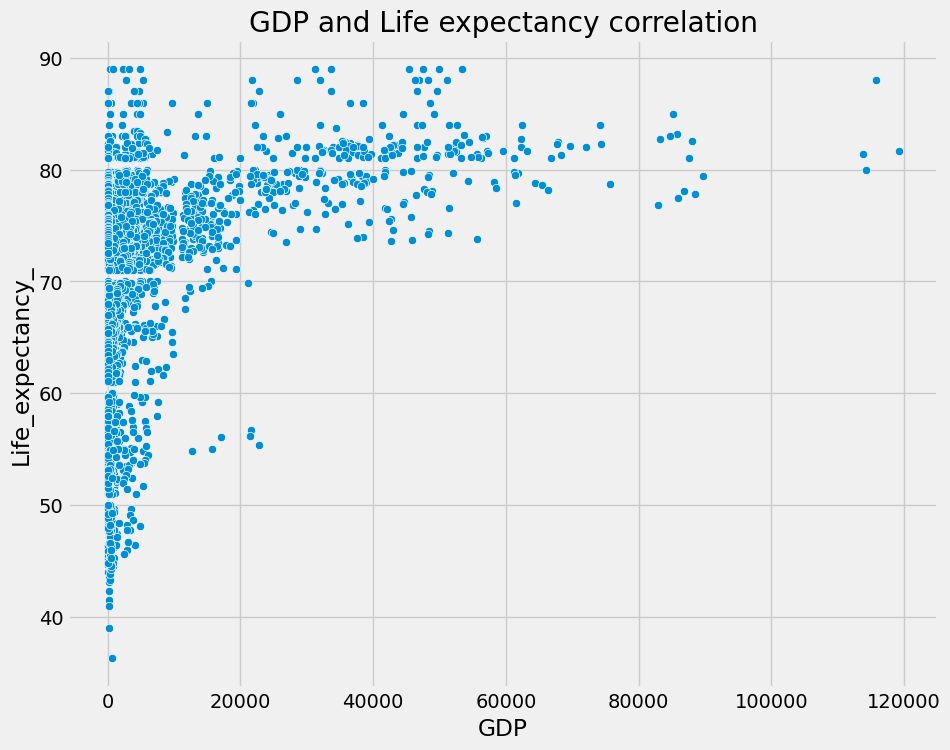

In [127]:
#Lets see if the life expectancy has correlation with gdpa

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.scatterplot(x=clean_df["GDP"], y= clean_df["Life_expectancy_"],legend=False)
plt.title("GDP and Life expectancy correlation" )
plt.show()

In [124]:
#in low gdp cases the life expectancy was distributed evenly accross the axes but for high GDP cases the life expectancy was very high

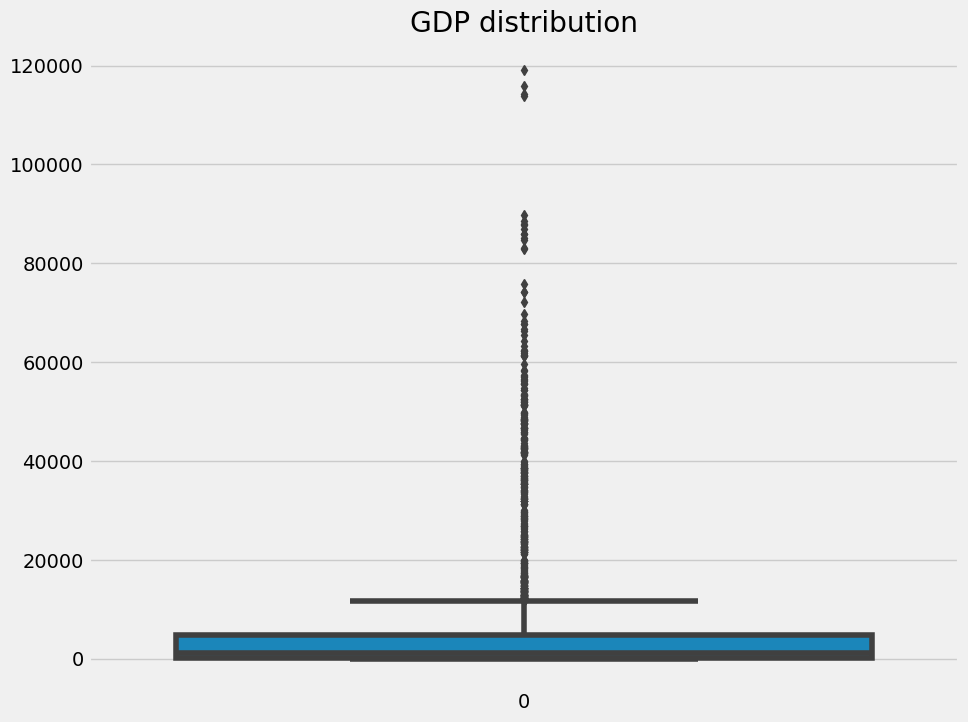

In [126]:
#lets try to find outliers in the GDP column

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.boxplot(clean_df["GDP"])
plt.title("GDP distribution" )
plt.show()

In [ ]:
#there are so many outliers which can appear because some countries currencies were not converted to usd


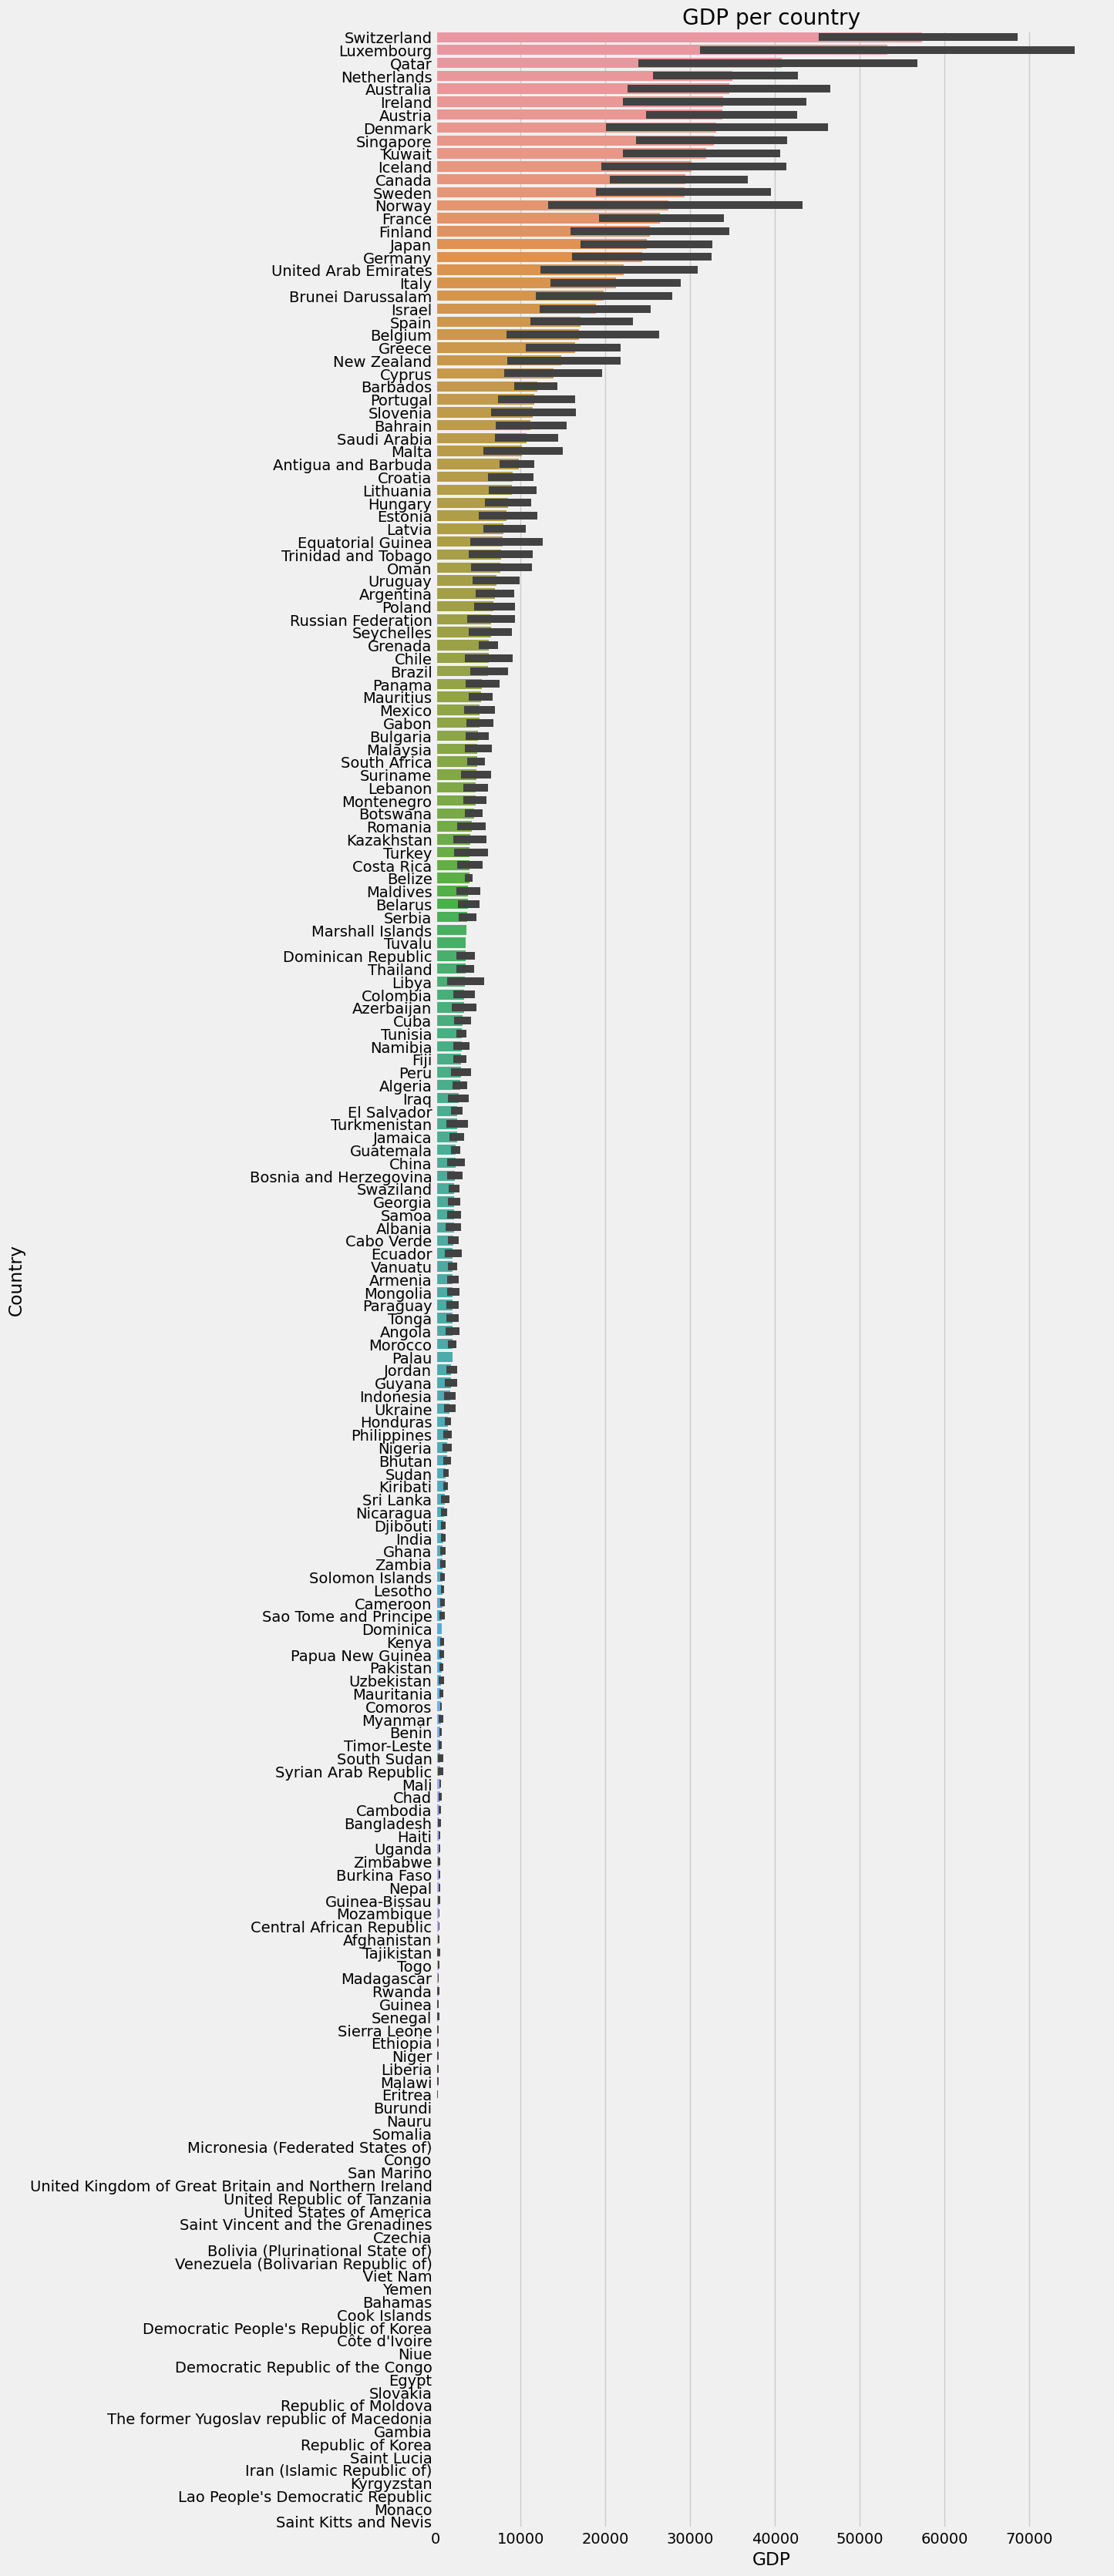

In [128]:
#lets try to find outliers in the GDP column

plt.figure(figsize=(10,40))
plt.style.use("fivethirtyeight")
order = clean_df.groupby(['Country']).mean().sort_values('GDP', ascending = False).index
sns.barplot(x=clean_df["GDP"],y=clean_df["Country"],order=order)
plt.title("GDP per country" )

plt.show()

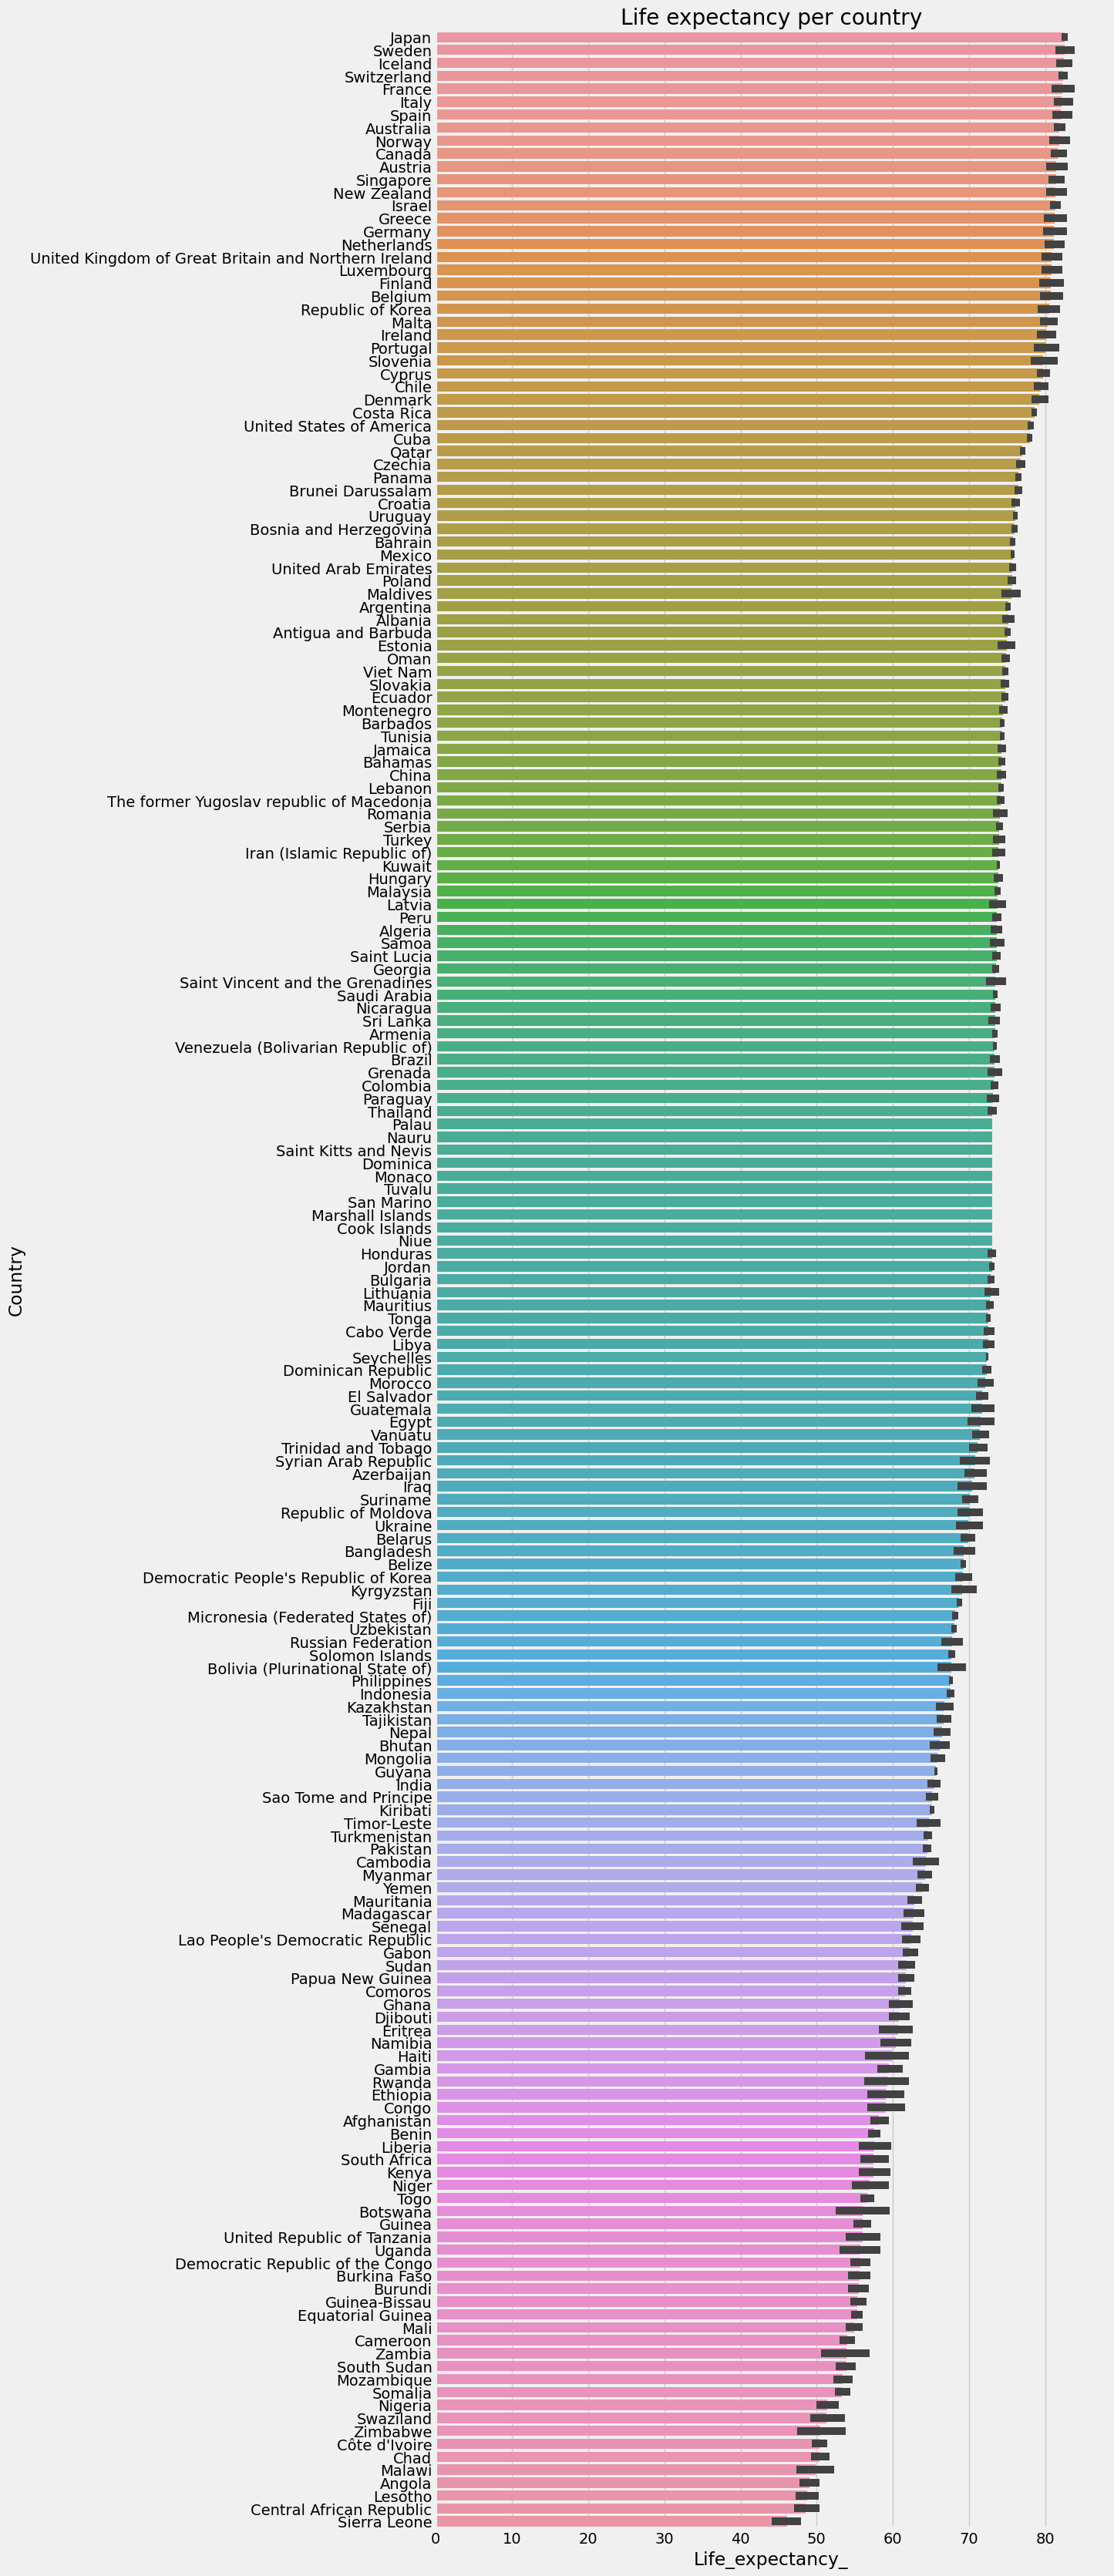

In [129]:
#lets try to find outliers in the GDP column

plt.figure(figsize=(10,40))
plt.style.use("fivethirtyeight")
order = clean_df.groupby(['Country']).mean().sort_values('Life_expectancy_', ascending = False).index
sns.barplot(x=clean_df["Life_expectancy_"],y=clean_df["Country"],order=order)
plt.title("Life expectancy per country" )

plt.show()

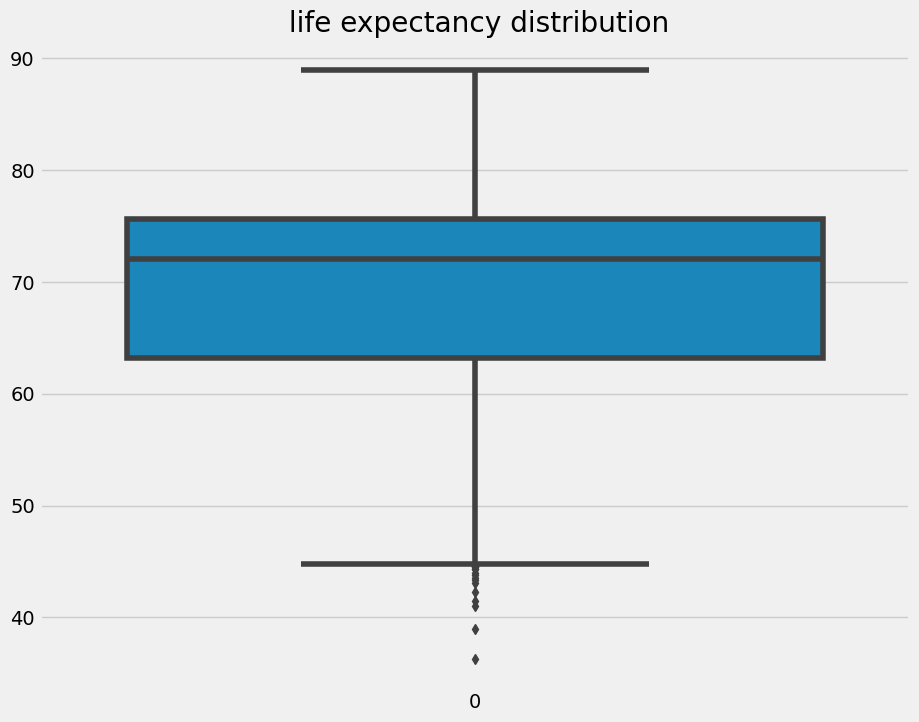

In [130]:
#lets try to find outliers in the life expectancy column

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.boxplot(clean_df["Life_expectancy_"])
plt.title(" life expectancy distribution" )


plt.show()

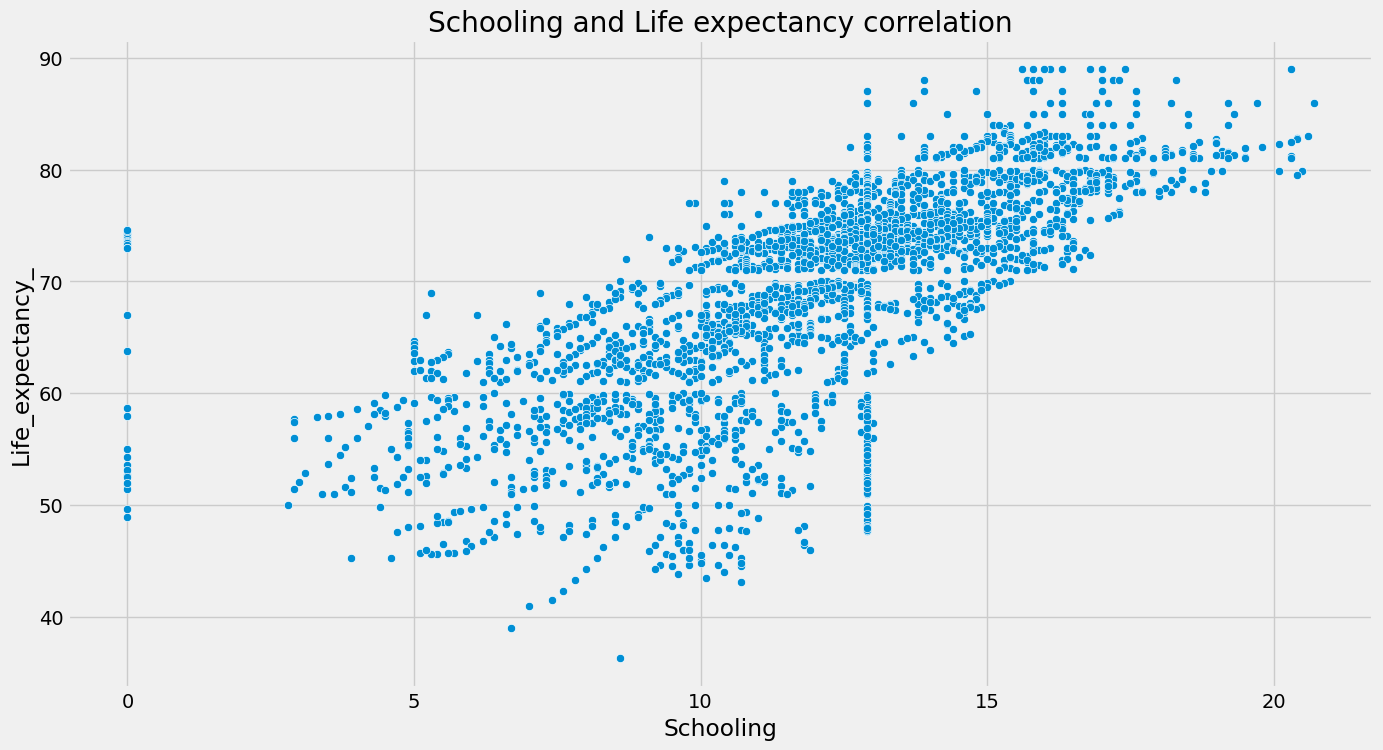

In [131]:
#Correlation between schooling and life expectancy


plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")
sns.scatterplot(x=clean_df["Schooling"],y=clean_df["Life_expectancy_"])
plt.title("Schooling and Life expectancy correlation" )

plt.show()

In [70]:
#there is strong evidence that countries with better schooling score are having more life expectancy

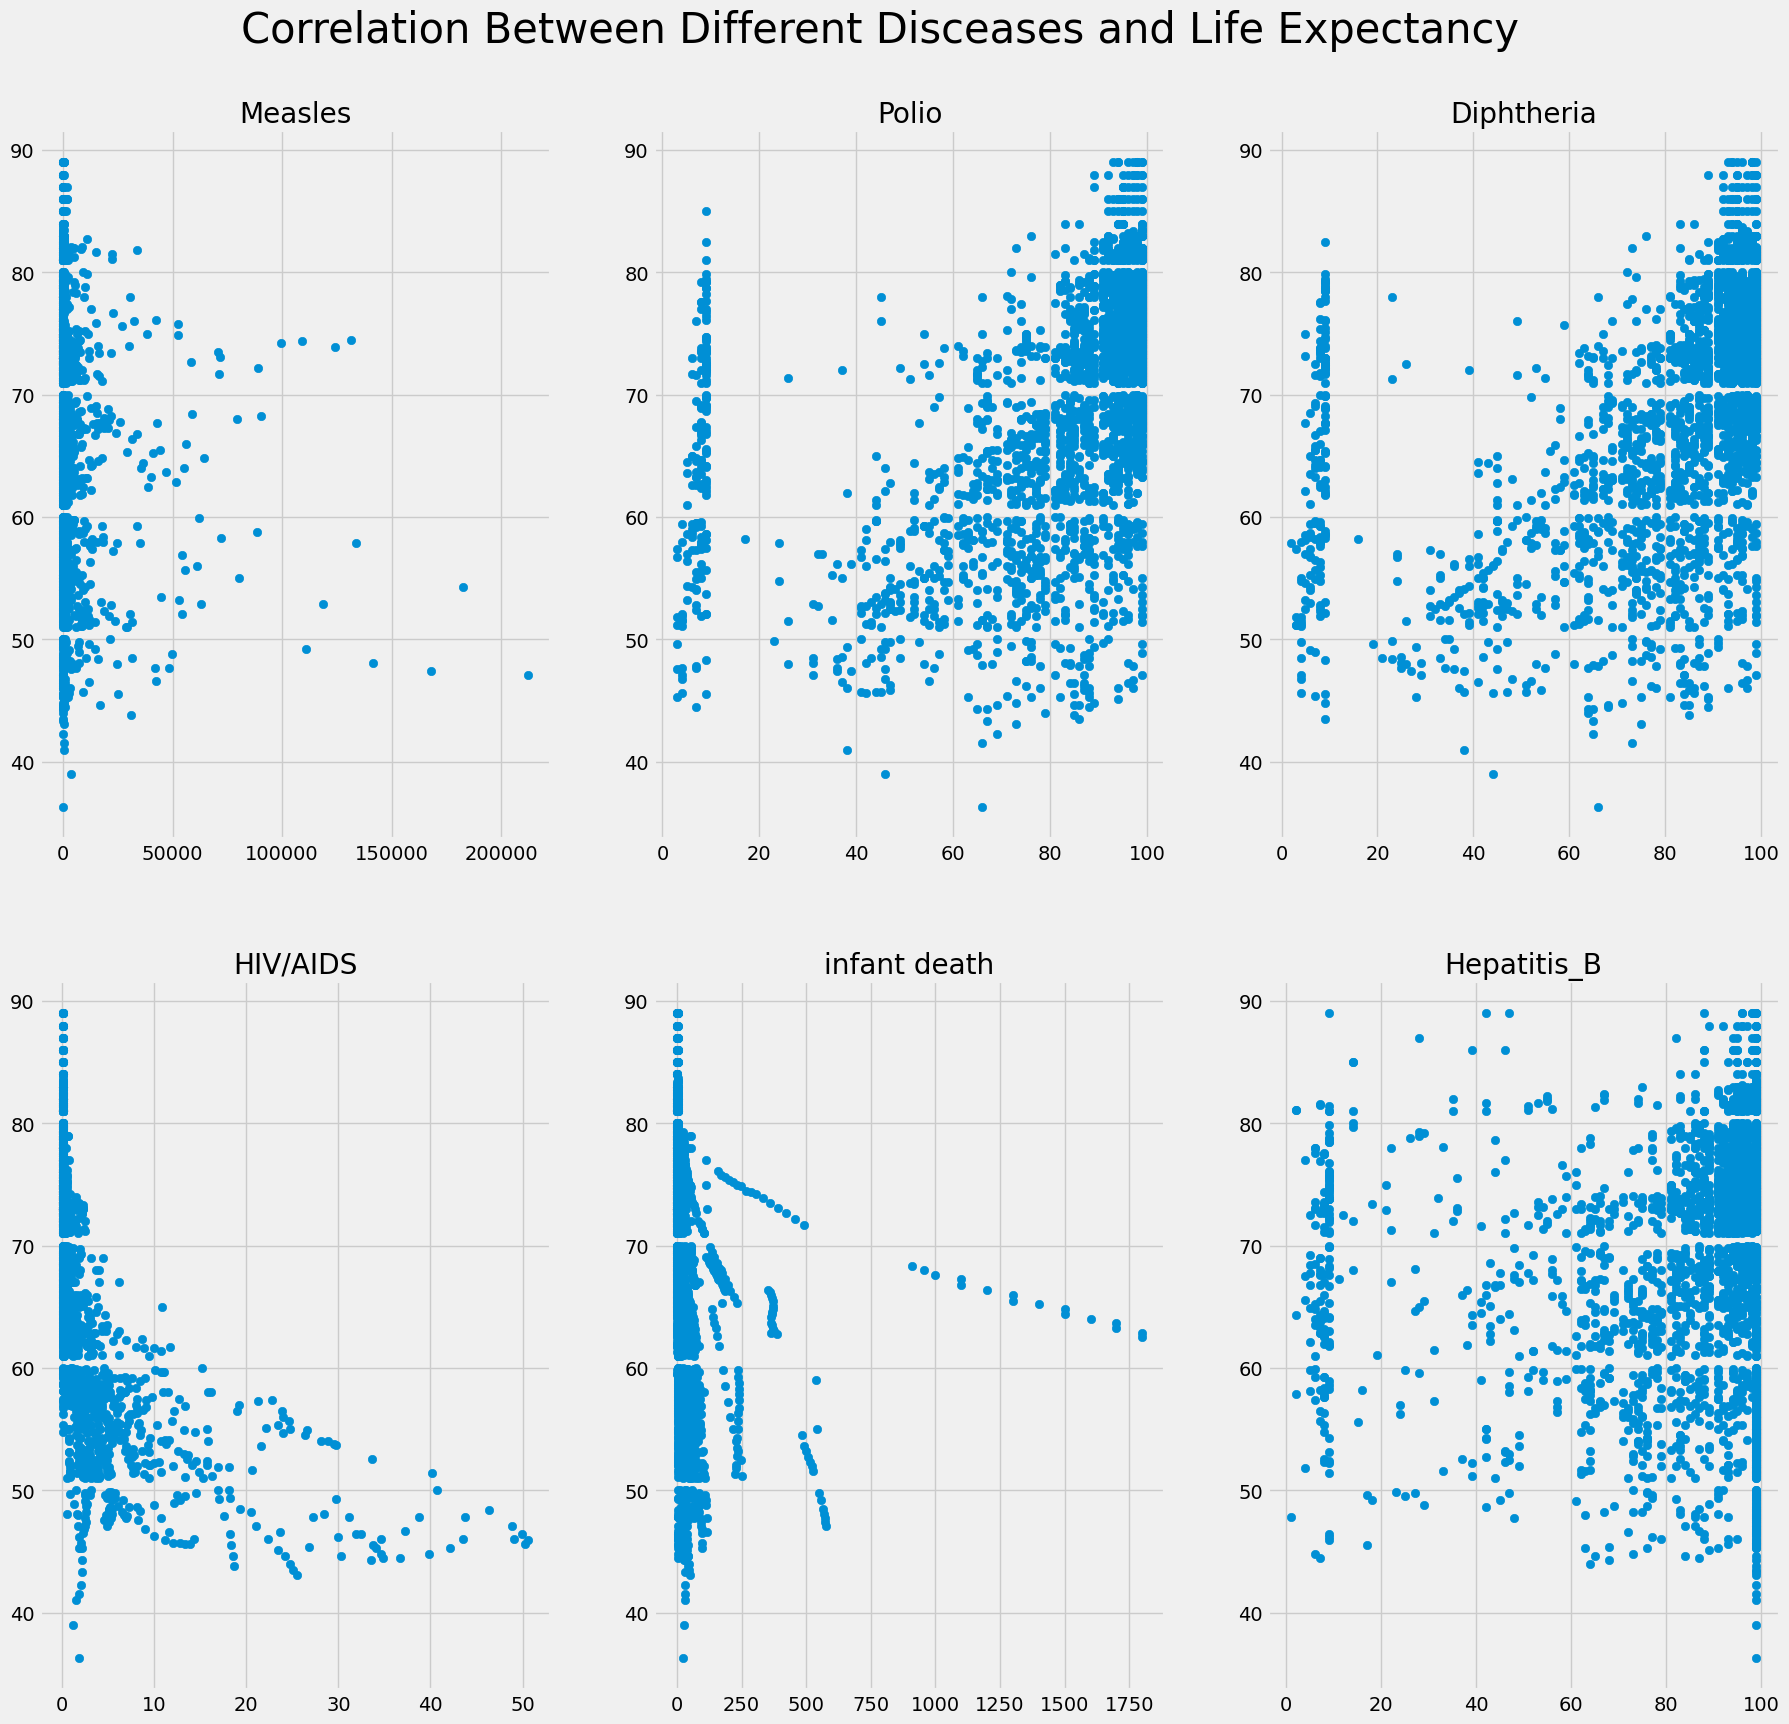

In [132]:
#the relationship between diseaces and life expectancy
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.scatter(clean_df["Measles_"], clean_df["Life_expectancy_"])
plt.title("Measles")
plt.subplot(2,3,2)
plt.scatter(clean_df["Polio"], clean_df["Life_expectancy_"])
plt.title("Polio")
plt.subplot(2,3,3)
plt.scatter(clean_df["Diphtheria_"], clean_df["Life_expectancy_"])
plt.title("Diphtheria")
plt.subplot(2,3,4)
plt.scatter(clean_df["_HIV/AIDS"], clean_df["Life_expectancy_"])
plt.title("HIV/AIDS")
plt.subplot(2,3,5)
plt.scatter(clean_df["infant_deaths"], clean_df["Life_expectancy_"])
plt.title("infant death")
plt.subplot(2,3,6)
plt.scatter(clean_df["Hepatitis_B"], clean_df["Life_expectancy_"])
plt.title("Hepatitis_B")
plt.subplots_adjust(top=0.85)
plt.gcf().text(0.5,0.9,"Correlation Between Different Disceases and Life Expectancy",fontsize =30,ha = "center",va="center")
plt.show()



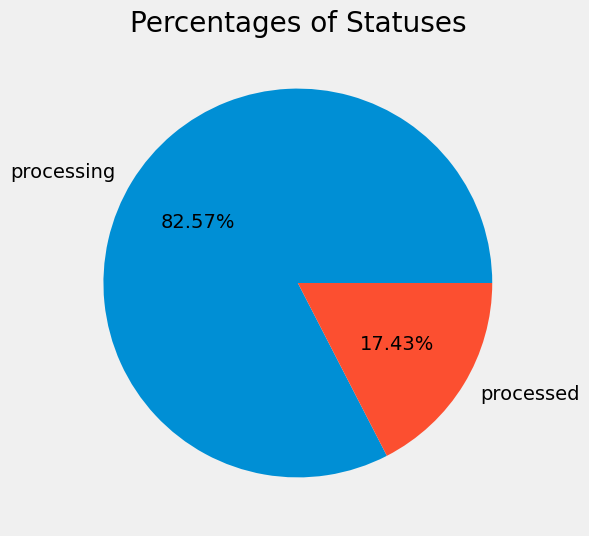

In [94]:
#ho see how much of data under the status processing and undersprocess
plt.figure(figsize=(6,6))
clean_df.groupby('Status').size().plot(kind='pie', autopct='%1.2f%%',labels=["processing","processed"],title= "Percentages of Statuses")
plt.show()

In [133]:
clean_df["Status"].nunique()

2

In [134]:
#now let us start with some preprocessing before training machine learning model
# we will need to delete the country column because it is categorical

ml_df = clean_df.drop(columns=["Country"])
ml_df

Year  Status  Life_expectancy_  Adult_Mortality  infant_deaths  Alcohol  \
0     2015       0              65.0            263.0             62     0.01   
1     2014       0              59.9            271.0             64     0.01   
2     2013       0              59.9            268.0             66     0.01   
3     2012       0              59.5            272.0             69     0.01   
4     2011       0              59.2            275.0             71     0.01   
...    ...     ...               ...              ...            ...      ...   
2933  2004       0              44.3            723.0             27     4.36   
2934  2003       0              44.5            715.0             26     4.06   
2935  2002       0              44.8             73.0             25     4.43   
2936  2001       0              45.3            686.0             25     1.72   
2937  2000       0              46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles_  _BMI_  ...  Polio  \
0                  71.279624         65.0      1154   19.1  ...    6.0   
1                  73.523582         62.0       492   18.6  ...   58.0   
2                  73.219243         64.0       430   18.1  ...   62.0   
3                  78.184215         67.0      2787   17.6  ...   67.0   
4                   7.097109         68.0      3013   17.2  ...   68.0   
...                      ...          ...       ...    ...  ...    ...   
2933                0.000000         68.0        31   27.1  ...   67.0   
2934                0.000000          7.0       998   26.7  ...    7.0   
2935                0.000000         73.0       304   26.3  ...   73.0   
2936                0.000000         76.0       529   25.9  ...   76.0   
2937                0.000000         79.0      1483   25.5  ...   78.0   

      Total_expenditure  Diphtheria_  _HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358878  12222251.0   

      _thinness__1-19_years  _thinness_5-9_years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938

In [135]:
#lets convert the year to datetime

ml_df["Year"]= pd.to_datetime(ml_df["Year"])
